## **Download Data Set**

In [ ]:
!wget --no-check-certificate \https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-04 07:06:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.48MB/s    in 46s     

2020-11-04 07:07:25 (6.67 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## **Ekstrak Data dari zip file**

In [ ]:
import zipfile, os

path_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(path_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

# **Cek Isi Direktori dari base_url**

In [ ]:
os.listdir(base_dir)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

# **Mempersiapkan Data Train dan Data Validation yang akan diberikan ke model**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4
                    )

# **Data Generator**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (120, 120),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle=True
)

valid_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (120, 120),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Mode Squential**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

# **Compile Model**

In [ ]:
model.compile(
    optimizer=tf.optimizers.RMSprop(),
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

# **Latih Model**

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=15,
      validation_data=valid_generator,
      validation_steps=8,
      verbose=2
  )

Epoch 1/15
20/20 - 14s - loss: 0.2010 - accuracy: 0.9656 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 2/15
20/20 - 13s - loss: 0.0553 - accuracy: 0.9852 - val_loss: 0.0687 - val_accuracy: 0.9727
Epoch 3/15
20/20 - 13s - loss: 0.0199 - accuracy: 0.9918 - val_loss: 0.0824 - val_accuracy: 0.9766
Epoch 4/15
20/20 - 13s - loss: 0.0061 - accuracy: 0.9967 - val_loss: 0.0470 - val_accuracy: 0.9805
Epoch 5/15
20/20 - 13s - loss: 0.1310 - accuracy: 0.9656 - val_loss: 0.0860 - val_accuracy: 0.9922
Epoch 6/15
20/20 - 13s - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.0358 - val_accuracy: 0.9922
Epoch 7/15
20/20 - 13s - loss: 0.0251 - accuracy: 0.9902 - val_loss: 0.0970 - val_accuracy: 0.9688
Epoch 8/15
20/20 - 13s - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0777 - val_accuracy: 0.9805
Epoch 9/15
20/20 - 13s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9961
Epoch 10/15
20/20 - 13s - loss: 0.1689 - accuracy: 0.9820 - val_loss: 0.0612 - val_accuracy: 0.9766
Epoch 11/

# **Membuat Form input image**

In [ ]:
import numpy as np
from google.colab import files

upload_img = files.upload()

Saving 5CzwWCDnxKOJz5T0.png to 5CzwWCDnxKOJz5T0.png


# **Prediction**

Gunting


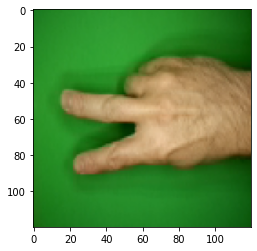

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for key in upload_img.keys():
  path = key
  img = image.load_img(path, target_size=(120,120))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] == 1: 
    print("Kertas")
  elif classes[0][1] == 1:
    print("Batu")
  elif classes[0][2] == 1:
    print("Gunting")
  else:
    print("Tak terdeteksi")